In [49]:
import pandas as pd 
import numpy as np
import scipy.stats

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
ratings = pd.read_csv(r"E:\study hard\uneeq\task 1\ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [51]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [52]:
print("The ratings dataset has", ratings["userId"].nunique(), "unique Users")
print("The ratings dataset has", ratings["movieId"].nunique(), "unique Movies")
print("The ratings dataset has", ratings["rating"].nunique(), "unique ratings")
print("The unique ratings are", sorted(ratings["rating"].unique()))

The ratings dataset has 610 unique Users
The ratings dataset has 9724 unique Movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [53]:
movies = pd.read_csv(r"E:\study hard\uneeq\task 1\movies.csv")
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [54]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [55]:
print("The Movies dataset has", movies["movieId"].nunique(), "unique Movies")
print("The Movies dataset has", movies["title"].nunique(), "unique titles")

The Movies dataset has 9742 unique Movies
The Movies dataset has 9737 unique titles


In [56]:
df = pd.merge(ratings, movies, on="movieId", how="inner")
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [57]:
#aggrigate by movie
agg_ratings = df.groupby("title").agg(mean_rating = ("rating","mean"),
                                     number_of_ratings = ("rating","count")).reset_index()

#Keep only the movies with more than 100 ratings
agg_ratings_MT100 = agg_ratings[agg_ratings["number_of_ratings"]>100]
agg_ratings_MT100

,title,mean_rating,number_of_ratings
74,2001: A Space Odyssey (1968),3.894495,109
207,Ace Ventura: Pet Detective (1994),3.040373,161
298,Aladdin (1992),3.792350,183
327,Alien (1979),3.969178,146
333,Aliens (1986),3.964286,126
...,...,...,...
9119,"Usual Suspects, The (1995)",4.237745,204
9215,WALL·E (2008),4.057692,104
9298,Waterworld (1995),2.913043,115
9485,Willy Wonka & the Chocolate Factory (1971),3.873950,119


In [58]:
agg_ratings_MT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [59]:
#check the popular movies
agg_ratings_MT100.sort_values(by="number_of_ratings",ascending=False).head(10)

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4662,Jurassic Park (1993),3.750000,238
1337,Braveheart (1995),4.031646,237
8363,Terminator 2: Judgment Day (1991),3.970982,224
7421,Schindler's List (1993),4.225000,220


### Next. let's use a jojntplot to check the correlation between the average rating and the number of ratings.
### We can see an upward trend from the scatter plot, showing that popular movies get higher ratings.
### The average rating distribution shows that most movies In the dataset have an average rating ot around 4.
### The number of rating distribution shows that most movies have less than 150 ratings.

C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


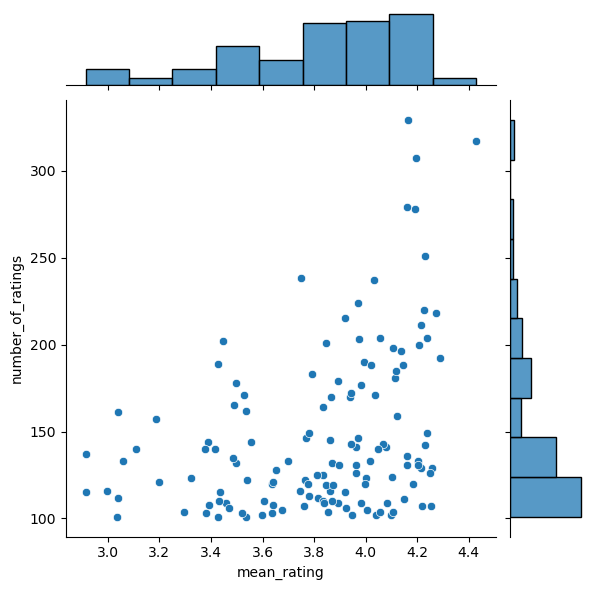

In [60]:
# Visualization
sns.jointplot(x="mean_rating", y="number_of_ratings", data=agg_ratings_MT100)

In [61]:
agg_ratings_MT100["title"]

74                    2001: A Space Odyssey (1968)
207              Ace Ventura: Pet Detective (1994)
298                                 Aladdin (1992)
327                                   Alien (1979)
333                                  Aliens (1986)
                           ...                    
9119                    Usual Suspects, The (1995)
9215                                 WALL·E (2008)
9298                             Waterworld (1995)
9485    Willy Wonka & the Chocolate Factory (1971)
9615                                  X-Men (2000)
Name: title, Length: 134, dtype: object

In [62]:
df_MT100 =pd.merge(df, agg_ratings_MT100[['title']], on="title", how="inner")
df_MT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     19788 non-null  int64  
 1   movieId    19788 non-null  int64  
 2   rating     19788 non-null  float64
 3   timestamp  19788 non-null  int64  
 4   title      19788 non-null  object 
 5   genres     19788 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 927.7+ KB


In [63]:
print("The ratings dataset has", df_MT100["userId"].nunique(), "unique Users")
print("The ratings dataset has", df_MT100["movieId"].nunique(), "unique Movies")
print("The ratings dataset has", df_MT100["rating"].nunique(), "unique ratings")
print("The unique ratings are", sorted(df_MT100["rating"].unique()))

The ratings dataset has 597 unique Users
The ratings dataset has 134 unique Movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [64]:
#Create User-Movie Matrix
matrix = df_MT100.pivot_table(index="title",columns="userId",values="rating")
matrix.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.0,NaN,4.5
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.5,NaN,3.0
Aladdin (1992),NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,NaN,4.0,...,NaN,NaN,NaN,3.0,3.5,NaN,NaN,3.0,NaN,NaN
Alien (1979),4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,4.0,3.0,4.0,NaN,4.5
Aliens (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,NaN,5.0
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4.0
American Beauty (1999),5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,1.0,...,NaN,NaN,5.0,NaN,NaN,4.5,3.0,5.0,NaN,3.5
American History X (1998),5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN
American Pie (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.5,NaN,NaN


In [65]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis=0)
matrix_norm.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,0.105505,NaN,NaN,NaN,...,NaN,NaN,1.105505,NaN,NaN,1.105505,NaN,-0.894495,NaN,0.605505
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,-0.040373,-0.040373,NaN,NaN,NaN,NaN,...,NaN,-1.040373,NaN,-1.040373,NaN,NaN,NaN,0.459627,NaN,-0.040373
Aladdin (1992),NaN,NaN,NaN,0.207650,0.207650,1.207650,-0.792350,NaN,NaN,0.207650,...,NaN,NaN,NaN,-0.792350,-0.29235,NaN,NaN,-0.792350,NaN,NaN
Alien (1979),0.030822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.030822,NaN,NaN,0.030822,-0.969178,0.030822,NaN,0.530822
Aliens (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.035714,NaN,NaN,-0.464286,NaN,0.535714,NaN,1.035714
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.316667,NaN,NaN,NaN,-0.183333
American Beauty (1999),0.943627,NaN,NaN,0.943627,NaN,NaN,-0.056373,NaN,NaN,-3.056373,...,NaN,NaN,0.943627,NaN,NaN,0.443627,-1.056373,0.943627,NaN,-0.556373
American History X (1998),0.782946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.217054,NaN,NaN,-0.217054,NaN,-0.217054,NaN,NaN
American Pie (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.378641,NaN,NaN,-2.378641,NaN,-0.878641,NaN,NaN


In [66]:
# item similarity matrix using pearson correlation
item_similarity = matrix_norm.T.corr()
item_similarity

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),1.000000,-0.036319,0.017446,0.318523,0.317386,0.324150,0.193592,0.152405,0.011490,0.478877,...,-0.108291,-0.012451,-0.041791,-0.458642,0.152271,0.245279,0.100172,-0.447306,0.087803,-0.123862
Ace Ventura: Pet Detective (1994),-0.036319,1.000000,0.302193,-0.208017,-0.107524,-0.030425,0.040435,0.065549,0.173855,0.245829,...,0.139896,0.188089,0.054408,0.176930,-0.007853,-0.061520,0.170717,0.176155,0.051239,0.045676
Aladdin (1992),0.017446,0.302193,1.000000,0.026514,0.151152,0.445204,0.127764,0.262014,0.367076,0.015038,...,0.333687,0.562311,-0.069176,0.137215,0.171330,0.153934,0.272375,0.065342,0.164459,0.285480
Alien (1979),0.318523,-0.208017,0.026514,1.000000,0.705925,0.387215,0.215751,0.035373,-0.006804,0.378709,...,0.199538,0.178620,0.108327,0.022007,-0.098813,0.350428,0.270697,0.119849,0.117749,0.030257
Aliens (1986),0.317386,-0.107524,0.151152,0.705925,1.000000,0.540458,0.111452,0.139326,0.076674,0.221920,...,0.369971,0.287243,0.084792,0.092412,0.195581,0.296933,0.294852,-0.014274,0.111864,0.225923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Usual Suspects, The (1995)",0.245279,-0.061520,0.153934,0.350428,0.296933,0.334559,0.350545,0.276079,0.280924,0.182520,...,0.143424,0.064293,0.255347,-0.390032,0.468998,1.000000,0.378580,-0.194911,0.220837,0.173727
WALL·E (2008),0.100172,0.170717,0.272375,0.270697,0.294852,0.102326,0.216398,0.042043,0.060699,0.165662,...,0.303725,0.138136,0.513187,-0.162762,0.496807,0.378580,1.000000,-0.112344,0.095842,0.126949
Waterworld (1995),-0.447306,0.176155,0.065342,0.119849,-0.014274,-0.322291,-0.216045,-0.187477,0.180433,-0.094090,...,0.092716,0.141998,0.252467,0.191565,-0.200842,-0.194911,-0.112344,1.000000,0.136267,0.115242


In [67]:
# item similarity matrix using cosine similarity
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine

array([[ 1.        , -0.00896029,  0.01415581, ..., -0.08543583,
         0.0387289 , -0.05929884],
       [-0.00896029,  1.        ,  0.18349799, ...,  0.09401611,
         0.01525033,  0.01682738],
       [ 0.01415581,  0.18349799,  1.        , ...,  0.03938066,
         0.06071451,  0.08986864],
       ...,
       [-0.08543583,  0.09401611,  0.03938066, ...,  1.        ,
         0.03348121,  0.02301284],
       [ 0.0387289 ,  0.01525033,  0.06071451, ...,  0.03348121,
         1.        ,  0.035578  ],
       [-0.05929884,  0.01682738,  0.08986864, ...,  0.02301284,
         0.035578  ,  1.        ]])

#### In the movie similarity matrix. the values range from -1 to 1, where -1 means opposite movie similarity and 1 means very high movie similarity.

In [79]:
picked_userId = 1
picked_movie = "Aladdin (1992)"

picked_userId_movie = pd.DataFrame(matrix_norm[picked_userId].dropna(axis=0, how ="all")
                                   .sort_values(ascending=False))\
                                   .reset_index()\
                                   .rename(columns={1:"rating"})

picked_userId_movie.head()                                  

,title,rating
0,Dumb & Dumber (Dumb and Dumber) (1994),1.939850
1,Indiana Jones and the Temple of Doom (1984),1.361111
2,X-Men (2000),1.300752
3,E.T. the Extra-Terrestrial (1982),1.233607
4,Ghostbusters (a.k.a. Ghost Busters) (1984),1.225000


In [98]:
picked_movie_simiarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={"Aladdin (1992)":"similarity_score"})

picked_userId_watched_similarity = pd.merge(left = picked_userId_movie,
                                           right = picked_movie_simiarity_score,
                                           on="title",
                                           how = "inner").sort_values("similarity_score", ascending=False)[:5]

picked_userId_watched_similarity

,title,rating,similarity_score
38,Toy Story (1995),0.079070,0.611892
12,Back to the Future (1985),0.961988,0.531754
45,Forrest Gump (1994),-0.164134,0.464268
4,Ghostbusters (a.k.a. Ghost Busters) (1984),1.225000,0.433920
51,Men in Black (a.k.a. MIB) (1997),-0.487879,0.425021


In [107]:
# Calcuate the predicated rating using average of similarity scores and the ratings from user 1

predicted_rating = round(np.average(picked_userId_watched_similarity["rating"],
                                   weights=picked_userId_watched_similarity["similarity_score"]), 6)

print(f'The predicted rating for {picked_movie} by user {picked_userId} is {predicted_rating}' )

The predicted rating for Aladdin (1992) by user 1 is 0.327508
